# Automated Air-Liquid Interface Cell Culture Analysis Using Deep Optical Flow

## Autogenerated Report: RAINBOW Air-Liquid Interface Cell Culture Analysis
#### Website: https://github.com/AlphonsGwatimba/Automated-Air-Liquid-Interface-Cell-Culture-Analysis-Using-Deep-Optical-Flow

In [1]:
# %matplotlib widget

import json
import os
from collections import defaultdict

import cv2

from IPython.display import Image, Video

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow 

import pandas as pd

import rainbow
from rainbow.data_analysis import (gen_base_metrics, dirn_scatter,
                                   mag_scatter, save_stats,
                                   save_quiver_plots, save_heatmaps)
from rainbow.optical_flow.optical_flow import flow_to_img
from rainbow.util import (cleanup_dir, comb_imgs, load_optical_flow, load_std_imgs, 
                          save_video, save_img_ser, video_reshape)

import yaml

VID_FILENAME = 'Video'

## Source directory

In [2]:
curr_dir = os.getcwd()
print(curr_dir)

C:\Users\Alphons\OneDrive\Documents\image_series_1\(tif) 191018_HNA-ALI_d14.nd2 - 191018_HNA-ALI_d14.nd2 (series 03)0000_etc


## Image Series Type

In [3]:
# Load metadata
with open(f'{rainbow.METADATA_FILENAME}.json') as f:
    metadata = json.load(f)
    
print(metadata['type'])

.tif


## RAINBOW Analysis Timestamp

In [4]:
print(metadata['analysis_timestamp'])

27 June 2021, 16:22:54


## Image Series Metadata

In [5]:
print(json.dumps(metadata, sort_keys=True, indent=4))

{
    "analysis_timestamp": "27 June 2021, 16:22:54",
    "calibration_um": 0.31302569743655434,
    "dir": "C:\\Users\\Alphons\\OneDrive\\Documents\\image_series_1",
    "type": ".tif"
}


In [6]:
data = defaultdict(list)
flow_path = rainbow.OPTICAL_FLOW_FILENAME
data['preds'] = load_optical_flow(flow_path)
data['raw_imgs'] = load_std_imgs(rainbow.RAW_IMGS_DIR_NAME, 
                                 metadata['calibration_um'])
gen_base_metrics(data)
for key, unit, filename in zip(['mag_stats', 'dirn_stats'], ['um', 'deg'], 
        [rainbow.MAG_STATS_FILENME, rainbow.DIRN_STATS_FILENME]):
    save_stats(data[key], os.path.join(f'{filename}.csv'), unit)

## Magnitude Statistics

In [7]:
df = pd.read_csv(f'{rainbow.MAG_STATS_FILENME}.csv', sep=',')
print(df)

   frame  min (um)  max (um)  mean (um)  std (um)  var (um)
0      0  0.002189   5.65957   2.134026  0.769607  0.592295


## Direction Statistics

In [8]:
df = pd.read_csv(f'{rainbow.DIRN_STATS_FILENME}.csv', sep=',')
print(df)

   frame  min (deg)   max (deg)  mean (deg)   std (deg)     var (deg)
0      0   0.000291  359.999969  126.017021  124.564008  15516.192018


## Magnitude Scatter Plot

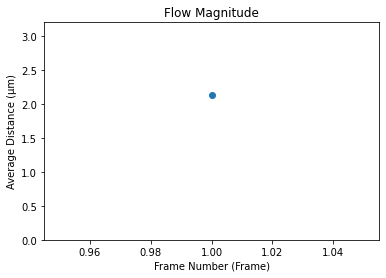

In [9]:
mag_scatter([s['mean'] for s in data['mag_stats']])

In [10]:
dpi = 1000
plt.savefig(f'{rainbow.MAG_SCATTER_FILENAME}.png', dpi=dpi)

<Figure size 432x288 with 0 Axes>

## Direction Scatter Plot

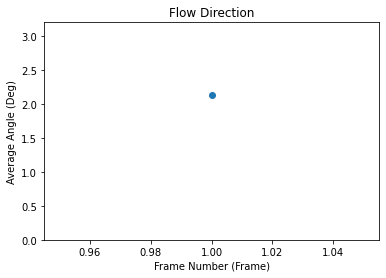

In [11]:
dirn_scatter([s['mean'] for s in data['mag_stats']])

In [12]:
plt.savefig(f'{rainbow.MAG_SCATTER_FILENAME}.png', dpi=dpi)

<Figure size 432x288 with 0 Axes>

In [13]:
data['flow_imgs'] = [flow_to_img(pred) for pred in data['preds']]
data['comb_imgs'] = [comb_imgs(img1, img2) for img1, img2 in zip(
                     data['raw_imgs'], data['flow_imgs'])]

for dir_name, imgs in zip([rainbow.FLOW_IMGS_DIR_NAME, rainbow.COMB_IMGS_DIR_NAME], 
                          [data['flow_imgs'], data['comb_imgs']]):
    img_ser_dir = os.path.join(curr_dir, dir_name)
    cleanup_dir(img_ser_dir)
    os.mkdir(img_ser_dir)  # already exists?
    save_img_ser(imgs, img_ser_dir, False)
    save_video(img_ser_dir, os.path.join(img_ser_dir, VID_FILENAME))

## Raw Image Series (left) and RAINBOW Optical Flow Visualisation (Right)

In [14]:
vid_path = os.path.join(rainbow.COMB_IMGS_DIR_NAME, VID_FILENAME + rainbow.util.VID_FILE_EXT)  
dsp_wdh, dsp_hgt = video_reshape(vid_path, 1000)
Video(vid_path, embed=True, width=dsp_wdh, height=dsp_hgt, html_attributes='controls loop')

a) The direction of motion at any position within RAINBOW generated optical flow images is measured clockwise from the initial horizontal position of a unit circle (left) and is shown using hue values (right). 

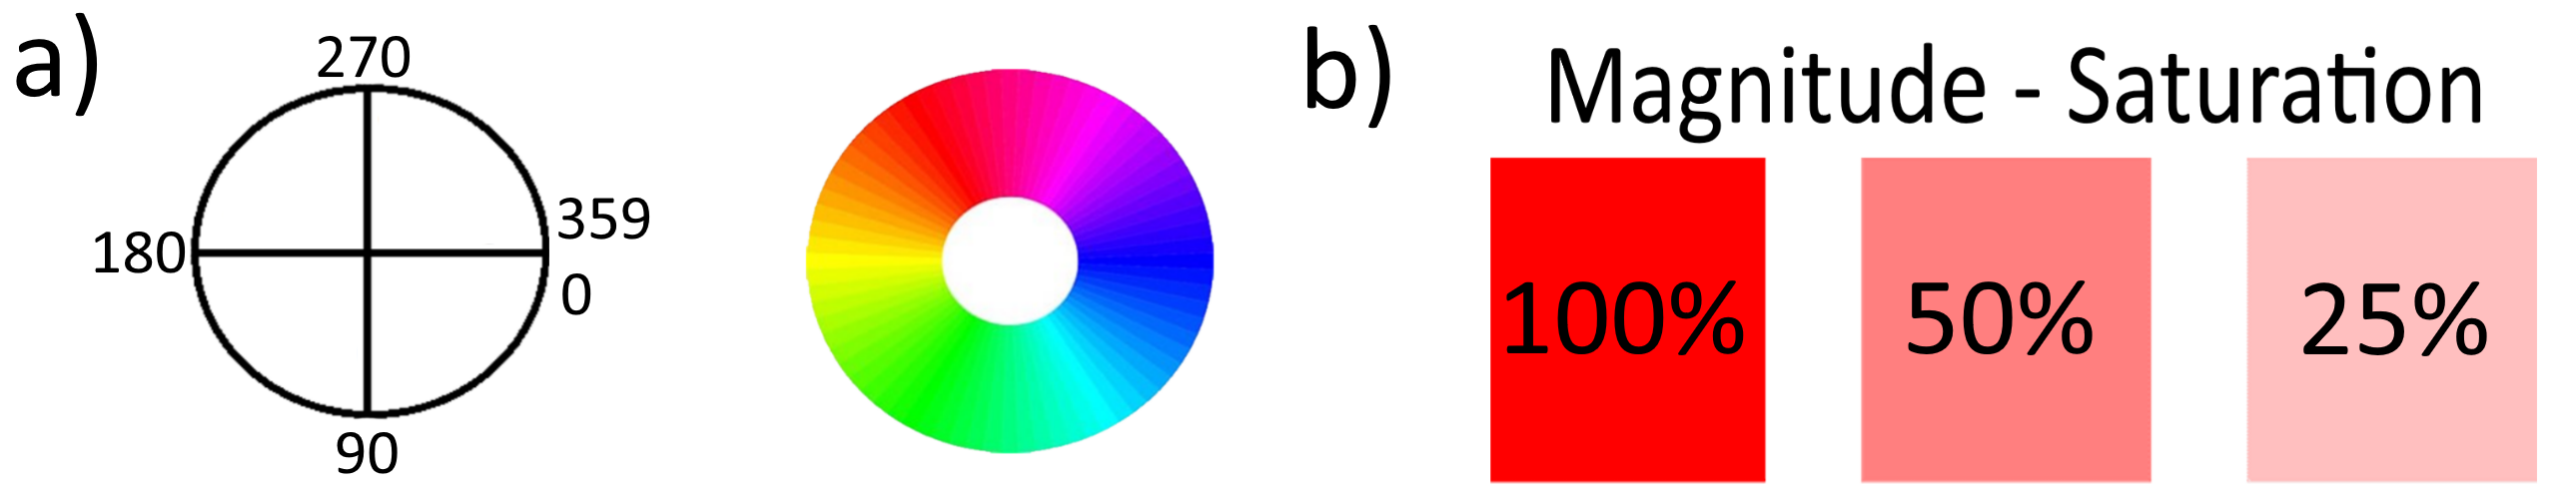

In [18]:
cleanup_dir(rainbow.HEATMAPS_DIR_NAME)
cleanup_dir(rainbow.QUIVER_PLOTS_DIR_NAME)
os.mkdir(rainbow.HEATMAPS_DIR_NAME)
os.mkdir(rainbow.QUIVER_PLOTS_DIR_NAME)
plt.ioff()
save_heatmaps(data['preds'], rainbow.HEATMAPS_DIR_NAME)
save_quiver_plots(data['preds'], rainbow.QUIVER_PLOTS_DIR_NAME)
plt.close()

## Magnitude Heatmaps Across Image Series

Visualization of motion magnitiude using heatmap with hot colour mapping.

In [16]:
vid_path = os.path.join(rainbow.HEATMAPS_DIR_NAME, VID_FILENAME)  
save_video(rainbow.HEATMAPS_DIR_NAME, vid_path, 5)
vid_path += rainbow.util.VID_FILE_EXT
dsp_wdh, dsp_hgt = video_reshape(vid_path, 640)
Video(vid_path, embed=True, width=dsp_wdh, height=dsp_hgt, html_attributes='controls loop')

## Quiver Plots Across Image Series

Visualisation of optical flow using quiver plots containing vector arrows.

In [17]:
vid_path = os.path.join(rainbow.QUIVER_PLOTS_DIR_NAME, VID_FILENAME)  
save_video(rainbow.QUIVER_PLOTS_DIR_NAME, vid_path, 5) 
vid_path += rainbow.util.VID_FILE_EXT
dsp_wdh, dsp_hgt = video_reshape(vid_path, 640)
Video(vid_path, embed=True, width=dsp_wdh, height=dsp_hgt, html_attributes='controls loop')